In [190]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [191]:
'''Position limits for the newly introduced products:

- `VOLCANIC_ROCK`: 400

`VOLCANIC_ROCK_VOUCHER_9500` :

- Position Limit: 200
- Strike Price: 9,500 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_9750` :

- Position Limit: 200
- Strike Price: 9,750 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_10000` :

- Position Limit: 200
- Strike Price: 10,000 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_10250` :

- Position Limit: 200
- Strike Price: 10,250 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_10500` :

- Position Limit: 200
- Strike Price: 10,500 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1'''


class Product:
    ROCK = 'VOLCANIC_ROCK'
    VOUCHER_9500 = 'VOLCANIC_ROCK_VOUCHER_9500'
    VOUCHER_9750 = 'VOLCANIC_ROCK_VOUCHER_9750'
    VOUCHER_10000 = 'VOLCANIC_ROCK_VOUCHER_10000'
    VOUCHER_10250 = 'VOLCANIC_ROCK_VOUCHER_10250'
    VOUCHER_10500 = 'VOLCANIC_ROCK_VOUCHER_10500'

position_limits = {
    Product.ROCK: 400,
    Product.VOUCHER_9500: 200,
    Product.VOUCHER_9750: 200,
    Product.VOUCHER_10000: 200,
    Product.VOUCHER_10250: 200,
    Product.VOUCHER_10500: 200
}

In [192]:
prices = pd.concat([pd.read_csv(f'round3/prices_round_3_day_{i}.csv', sep=';') for i in range(3)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round3/trades_round_3_day_{i}_nn.csv', sep=';') for i in range(3)], ignore_index=True)

In [193]:
prices['swmid'] = (prices['bid_price_1'] * prices['ask_volume_1'] + prices['ask_price_1'] * prices['bid_volume_1']) / (prices['ask_volume_1'] + prices['bid_volume_1'])

In [194]:
rock = prices[prices["product"] == Product.ROCK].reset_index(drop=True).copy()
voucher_9500 = prices[prices["product"] == Product.VOUCHER_9500].reset_index(drop=True).copy()
voucher_9750 = prices[prices["product"] == Product.VOUCHER_9750].reset_index(drop=True).copy()
voucher_10000 = prices[prices["product"] == Product.VOUCHER_10000].reset_index(drop=True).copy()
voucher_10250 = prices[prices["product"] == Product.VOUCHER_10250].reset_index(drop=True).copy()
voucher_10500 = prices[prices["product"] == Product.VOUCHER_10500].reset_index(drop=True).copy()

In [195]:
[rock, voucher_9500, voucher_9750, voucher_10000, voucher_10250, voucher_10500] = [df.rename(columns={'ask_price_1': 'ask_price', 'bid_price_1': 'bid_price', 'ask_volume_1': 'ask_volume', 'bid_volume_1': 'bid_volume'}) for df in [rock, voucher_9500, voucher_9750, voucher_10000, voucher_10250, voucher_10500]]

In [196]:
rock = rock.drop(columns=['product'], axis=1).rename(columns={col: col + '_rock' for col in rock.columns if col not in ['timestamp', 'day']})
voucher_9500 = voucher_9500.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher9500' for col in voucher_9500.columns if col not in ['timestamp', 'day']})
voucher_9750 = voucher_9750.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher9750' for col in voucher_9750.columns if col not in ['timestamp', 'day']})
voucher_10000 = voucher_10000.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher10000' for col in voucher_10000.columns if col not in ['timestamp', 'day']})
voucher_10250 = voucher_10250.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher10250' for col in voucher_10250.columns if col not in ['timestamp', 'day']})
voucher_10500 = voucher_10500.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher10500' for col in voucher_10500.columns if col not in ['timestamp', 'day']})

In [197]:
# join croissants, james, djembes, basket1, basket2 on timestamp
mk = rock.merge(voucher_9500, on=['day', 'timestamp'])
mk = mk.merge(voucher_9750, on=['day', 'timestamp'])
mk = mk.merge(voucher_10000, on=['day', 'timestamp'])
mk = mk.merge(voucher_10250, on=['day', 'timestamp'])
mk = mk.merge(voucher_10500, on=['day', 'timestamp'])
mk

,day,timestamp,bid_price_rock,bid_volume_rock,bid_price_2_rock,bid_volume_2_rock,bid_price_3_rock,bid_volume_3_rock,ask_price_rock,ask_volume_rock,...,bid_volume_3_voucher10500,ask_price_voucher10500,ask_volume_voucher10500,ask_price_2_voucher10500,ask_volume_2_voucher10500,ask_price_3_voucher10500,ask_volume_3_voucher10500,mid_price_voucher10500,profit_and_loss_voucher10500,swmid_voucher10500
0,0,0,10502.0,205.0,NaN,NaN,NaN,NaN,10504,146,...,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0,99.5
1,0,100,10509.0,192.0,NaN,NaN,NaN,NaN,10511,122,...,NaN,103,13,NaN,NaN,NaN,NaN,102.5,0.0,102.5
2,0,200,10512.0,167.0,NaN,NaN,NaN,NaN,10514,109,...,NaN,105,15,NaN,NaN,NaN,NaN,104.5,0.0,104.5
3,0,300,10517.0,118.0,10516.0,68.0,NaN,NaN,10518,118,...,NaN,107,13,NaN,NaN,NaN,NaN,106.5,0.0,106.5
4,0,400,10509.0,128.0,10508.0,73.0,NaN,NaN,10510,128,...,NaN,103,15,NaN,NaN,NaN,NaN,102.5,0.0,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,999500,10167.0,110.0,10166.0,51.0,NaN,NaN,10169,156,...,NaN,4,20,NaN,NaN,NaN,NaN,3.5,0.0,3.2
29996,2,999600,10166.0,161.0,NaN,NaN,NaN,NaN,10168,101,...,NaN,4,14,NaN,NaN,NaN,NaN,3.5,0.0,3.5
29997,2,999700,10166.0,143.0,10165.0,51.0,NaN,NaN,10168,194,...,NaN,4,13,NaN,NaN,NaN,NaN,3.5,0.0,3.5
29998,2,999800,10167.0,119.0,10166.0,57.0,NaN,NaN,10168,119,...,NaN,4,20,NaN,NaN,NaN,NaN,3.5,0.0,3.5


In [198]:
q = mk['day'] == 1
df = mk[q].copy()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['timestamp'], y=df['mid_price_rock'], mode='lines', name='Rock'))
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['mid_price_voucher10000'], mode='lines', name='Voucher 10000', yaxis='y2'))
fig.update_layout(
    title='Rock and Voucher 10000 Prices',
    xaxis_title='Timestamp',
    yaxis_title='Price',
    yaxis2=dict(
        title='Voucher 10000 Price',
        overlaying='y',
        side='right'
    )
)
fig.show()

In [199]:
from scipy.stats import norm

def realized_vol(df, window, step_size):
    df[f'log_return_{step_size}'] = np.log(df['mid_price_rock'].to_numpy()/df['mid_price_rock'].shift(step_size).to_numpy())
    dt = step_size / 250 / 10000 
    df[f'realized_vol_{step_size}'] = df[f'log_return_{step_size}'].rolling(window=window).apply(lambda x: np.mean(x[::step_size]**2) / dt)
    df[f'realized_vol_{step_size}'] = np.sqrt(df[f'realized_vol_{step_size}'].to_numpy())
    return df

def black_scholes_call(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot / strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    call_price = (spot * norm.cdf(d1) - strike * norm.cdf(d2))
    return call_price

In [200]:
# np.log(df['mid_price_rock']/df['mid_price_rock'].shift(1)).var() / (1/250/10000)
np.log(df['mid_price_rock']/df['mid_price_rock'].shift(1)).var() / (1/150/10000)

np.float64(0.09859272427196758)

In [201]:
df['mid_price_rock']

10000    10516.0
10001    10515.0
10002    10515.0
10003    10517.0
10004    10519.5
          ...   
19995    10224.5
19996    10225.5
19997    10222.0
19998    10223.5
19999    10220.5
Name: mid_price_rock, Length: 10000, dtype: float64

In [209]:
starting_days_to_expiry = 7
strike = 10_000

# hist_vol = 0.1643
hist_vol = 0.09859

realized_vol(df, 60, 1)
df['tte'] = tte = (starting_days_to_expiry - df['timestamp'] / 1_000_000) / 250
# df['tte'] = tte = (starting_days_to_expiry - df['timestamp'] / 1_000_000) / 250
# df['theo_call'] = df.apply(lambda row: black_scholes_call(row['mid_price_rock'], strike, row['tte'], row['realized_vol_1']), axis=1)
df['theo_call'] = df.apply(lambda row: black_scholes_call(row['mid_price_rock'], strike, row['tte'], hist_vol), axis=1)

# plot theo_call and mid_price_voucher10000
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['theo_call'], mode='lines', name='Theoretical Call Price'))
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['mid_price_voucher10000'], mode='lines', name='Voucher 10000 Price'))
fig.update_layout(
    title='Theoretical Call Price and Voucher 10000 Prices',
    xaxis_title='Timestamp',
    yaxis_title='Price'
)
fig.show()

In [203]:
# plot difference between theo_call and mid_price_voucher10000
df['diff'] = df['theo_call'] - df['mid_price_voucher10000']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['diff'], mode='lines', name='Difference'))
fig.update_layout(
    title='Difference between Theoretical Call Price and Voucher 10000 Prices',
    xaxis_title='Timestamp',
    yaxis_title='Difference'
)
fig.show()

In [204]:
# plot realized_vol_1 against timestamp
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['realized_vol_1'], mode='lines', name='Realized Volatility'))
fig.update_layout(
    title='Realized Volatility',
    xaxis_title='Timestamp',
    yaxis_title='Realized Volatility'
)
fig.show()

<Axes: >

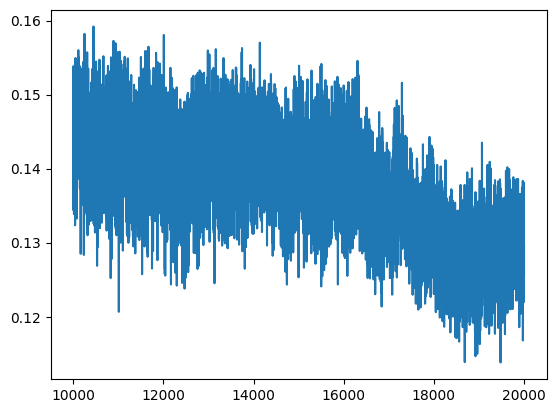

In [210]:
from scipy.optimize import brentq

def implied_volatility(call_price, spot, strike, time_to_expiry):
    # Define the equation where the root is the implied volatility
    def equation(volatility):
        estimated_price = black_scholes_call(spot, strike, time_to_expiry, volatility)
        return estimated_price - call_price

    # Using Brent's method to find the root of the equation
    implied_vol = brentq(equation, 1e-10, 3.0, xtol=1e-10)
    return implied_vol

df['iv'] = df.apply(lambda row: implied_volatility(row['mid_price_voucher10000'], row['mid_price_rock'], strike, row['tte']), axis=1)

df['iv'].plot()

In [211]:
df['iv'].describe()

count    10000.000000
mean         0.137766
std          0.007362
min          0.113813
25%          0.132406
50%          0.138384
75%          0.143138
max          0.159205
Name: iv, dtype: float64

In [213]:
df['iv'].median()

np.float64(0.13838392708519606)

<Axes: >

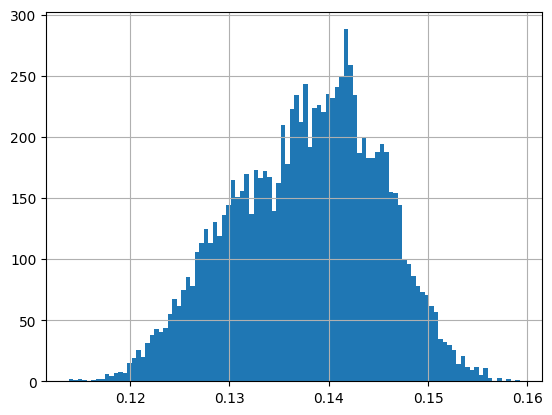

In [212]:
df['iv'].hist(bins=100)